<a href="https://colab.research.google.com/github/yashveersinghsohi/Hospital_Mortality_Prediction/blob/master/Hospital_00_Preliminary_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Reading Dataset

In [ ]:
data_path = "https://raw.githubusercontent.com/yashveersinghsohi/Hospital_Mortality_Prediction/master/Data/data.csv"
data = pd.read_csv(data_path)
data_copy = data.copy()

In [ ]:
# There is not much insight to gather from this feature
data = data.drop(["ID"], axis=1)

print("Data shape - ", data.shape)
data.head()

Data shape -  (1177, 50)


,group,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


Data types and number of not-null values of each column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   outcome                   1176 non-null   float64
 2   age                       1177 non-null   int64  
 3   gendera                   1177 non-null   int64  
 4   BMI                       962 non-null    float64
 5   hypertensive              1177 non-null   int64  
 6   atrialfibrillation        1177 non-null   int64  
 7   CHD with no MI            1177 non-null   int64  
 8   diabetes                  1177 non-null   int64  
 9   deficiencyanemias         1177 non-null   int64  
 10  depression                1177 non-null   int64  
 11  Hyperlipemia              1177 non-null   int64  
 12  Renal failure             1177 non-null   int64  
 13  COPD                      1177 non-null   int64  
 14  heart ra

# Train Test split

In [ ]:
train_val, test = train_test_split(data, test_size=0.1, random_state=42)
train, val = train_test_split(train_val, test_size=0.1, random_state=42)

# Handling Missing Values

Absolute counts of null values

In [ ]:
train.isna().sum()

group                         0
outcome                       1
age                           0
gendera                       0
BMI                         167
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   11
Systolic blood pressure      13
Diastolic blood pressure     13
Respiratory rate             11
temperature                  16
SP O2                        11
Urine output                 26
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 109
Basophils                   204
Lymphocy

%ages of null values and a barplot of the same for visualization

In [ ]:
train_nans = ((train.isna().sum()/train.shape[0]) * 100).round(3)
train_nans = train_nans[train_nans>0]
train_nans.sort_values(ascending=False, inplace=True)
train_nans

PH                          24.764
PCO2                        24.449
Basophils                   21.406
Lactic acid                 19.727
BMI                         17.524
Creatine kinase             13.851
Lymphocyte                  11.542
Neutrophils                 11.438
Urine output                 2.728
PT                           1.784
INR                          1.784
temperature                  1.679
glucose                      1.574
Diastolic blood pressure     1.364
Systolic blood pressure      1.364
SP O2                        1.154
Respiratory rate             1.154
heart rate                   1.154
Blood calcium                0.105
outcome                      0.105
dtype: float64

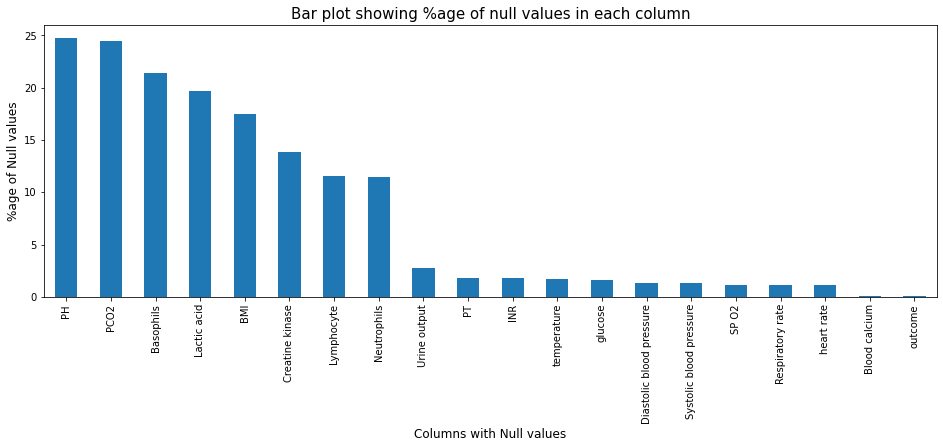

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
train_nans.plot.bar(ax=ax)
ax.set_xlabel("Columns with Null values", size=12)
ax.set_ylabel("%age of Null values", size=12)
ax.set_title("Bar plot showing %age of null values in each column", size=15)
plt.show()

**Approach used to remove null values**: 
- Since there is only one Null value in the target variable (`outcome`), let's remove that observation. 
- For the rest, let's impute them using mean imputation and add an extra column for each indicating that an imputation was done

In [ ]:
# Removing Null observation in outcome
train = train[-train["outcome"].isna()]
val = val[-val["outcome"].isna()]
test = test[-test["outcome"].isna()]

# Adding new columns where there were null values
for col in train.loc[:, train.isna().sum()>0].columns:
  new_col_name = col+"_was_missing"
  train[new_col_name] = train[col].isna().astype(np.int)
  val[new_col_name] = val[col].isna().astype(np.int)
  test[new_col_name] = test[col].isna().astype(np.int)

# Using mean imputation from SimpleImputer
imputer = SimpleImputer(strategy="mean")
train = pd.DataFrame(
    imputer.fit_transform(train), 
    columns=train.columns
  )
val = pd.DataFrame(
    imputer.transform(val), 
    columns=val.columns
  )
test = pd.DataFrame(
    imputer.transform(test), 
    columns=test.columns
  )

# Check if any null values are left in the train set
print("Train Nulls - ", train.isna().to_numpy().flatten().sum())
print("Val Nulls - ", val.isna().to_numpy().flatten().sum())
print("Test Nulls - ", test.isna().to_numpy().flatten().sum())

Train Nulls -  0
Val Nulls -  0
Test Nulls -  0


In [ ]:
print("Train Shape - ", train.shape)
print("Val Shape - ", val.shape)
print("Test Shape - ", test.shape)

Train Shape -  (952, 69)
Val Shape -  (106, 69)
Test Shape -  (118, 69)


# Target Distribution

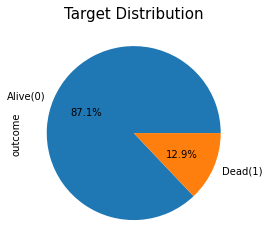

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
train["outcome"] = train["outcome"].astype(np.int)
train["outcome"].map({0:"Alive(0)", 1:"Dead(1)"}).value_counts().plot.pie(autopct="%.1f%%", ax=ax)
ax.set_title("Target Distribution", size=15)
plt.show()

# A few helper functions for plotting

In [ ]:
def plot_bin_pie(feature):
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))

  set0 = train[train[feature]==0]
  set0["outcome"].map({0:"Alive", 1:"Dead"}).value_counts().plot.pie(autopct="%.1f%%", ax=ax[0])
  ax[0].set_title(f"{feature} = 0", size=15)

  set1 = train[train[feature]==1]
  set1["outcome"].map({0:"Alive", 1:"Dead"}).value_counts().plot.pie(autopct="%.1f%%", ax=ax[1])
  ax[1].set_title(f"{feature} = 1", size=15)

  plt.show()

def plot_histogram_with_target(feature):
  fig, ax = plt.subplots(figsize=(8, 5))
  sns.histplot(data=train, x=feature, hue="outcome", ax=ax, kde=True)
  ax.set_title(f"Distribution of {feature}", size=15)
  ax.set_xlabel("")
  ax.set_ylabel("")
  plt.show()

def plot_box_plot_with_target(feature):
  fig, ax = plt.subplots(figsize=(8, 5))
  sns.boxplot(data=train, x="outcome", y=feature, ax=ax)
  ax.set_title(f"Distribution of {feature}", size=15)
  ax.set_xlabel("Outcome", size=12)
  ax.set_ylabel(f"{feature}", size=12)
  plt.show()

def plot_tri_pie(feature):
  q5 = train[feature].quantile(0.05)
  q95 = train[feature].quantile(0.95)

  fig, ax = plt.subplots(1, 3, figsize=(15, 5))

  set1 = train[train[feature]<q5]
  set1["outcome"].map({0:"Alive", 1:"Dead"}).value_counts().plot.pie(autopct="%.1f%%", ax=ax[0])
  ax[0].set_title(f"Lower 5 percentile of {feature}", size=15)

  set2 = train[(train[feature]>=q5) & (train[feature]<=q95)]
  set2["outcome"].map({0:"Alive", 1:"Dead"}).value_counts().plot.pie(autopct="%.1f%%", ax=ax[1])
  ax[1].set_title(f"Mid 95 percentile of {feature}", size=15)

  set3 = train[train[feature]>q95]
  set3["outcome"].map({0:"Alive", 1:"Dead"}).value_counts().plot.pie(autopct="%.1f%%", ax=ax[2])
  ax[2].set_title(f"Upper 5 percentile of {feature}", size=15)

  plt.show()

# Exploring features

## Demographic Characteristics

### BMI

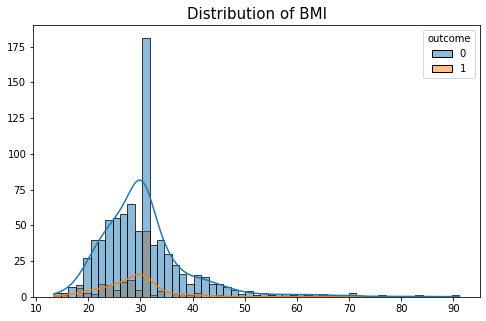

In [ ]:
plot_histogram_with_target("BMI")

### Age

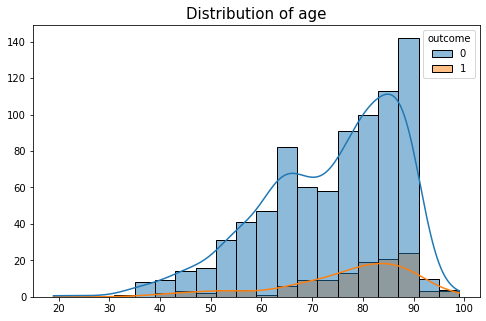

In [ ]:
plot_histogram_with_target("age")

### Gender

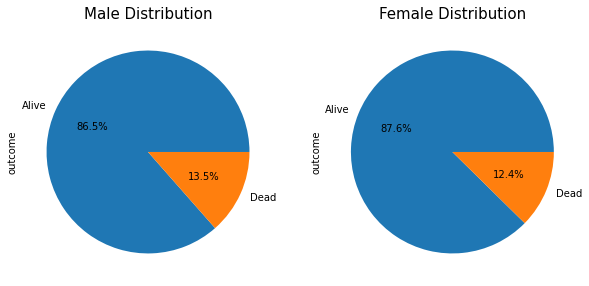

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

male = train[train["gendera"]==1]
male["outcome"].map({0:"Alive", 1:"Dead"}).value_counts().plot.pie(autopct="%.1f%%", ax=ax[0])
ax[0].set_title("Male Distribution", size=15)

female = train[train["gendera"]==2]
female["outcome"].map({0:"Alive", 1:"Dead"}).value_counts().plot.pie(autopct="%.1f%%", ax=ax[1])
ax[1].set_title("Female Distribution", size=15)

plt.show()

### Group

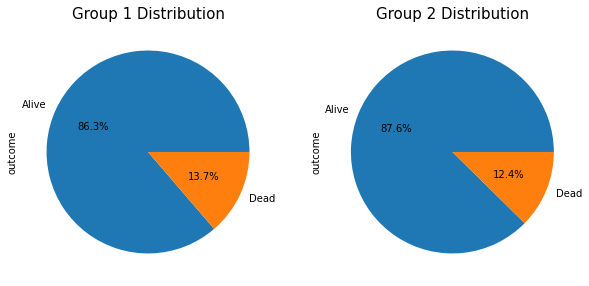

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

grp1 = train[train["group"]==1]
grp1["outcome"].map({0:"Alive", 1:"Dead"}).value_counts().plot.pie(autopct="%.1f%%", ax=ax[0])
ax[0].set_title("Group 1 Distribution", size=15)

grp2 = train[train["gendera"]==2]
grp2["outcome"].map({0:"Alive", 1:"Dead"}).value_counts().plot.pie(autopct="%.1f%%", ax=ax[1])
ax[1].set_title("Group 2 Distribution", size=15)

plt.show()

## Vital signs 

### Heart Rate

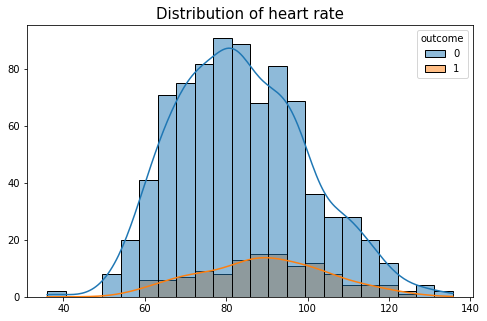

In [ ]:
plot_histogram_with_target("heart rate")

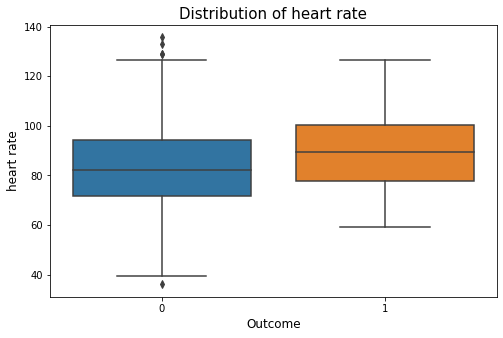

In [ ]:
plot_box_plot_with_target("heart rate")

### Systolic Blood Pressure

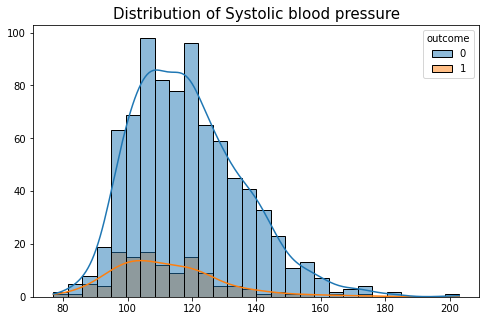

In [ ]:
plot_histogram_with_target("Systolic blood pressure")

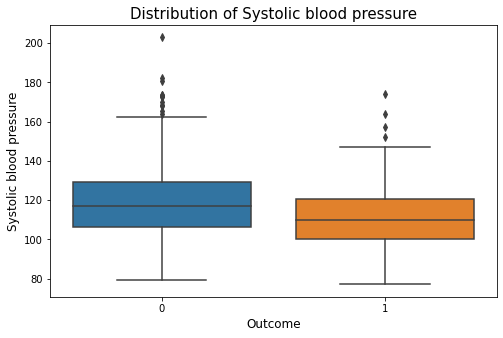

In [ ]:
plot_box_plot_with_target("Systolic blood pressure")

### Diastolic blood pressure

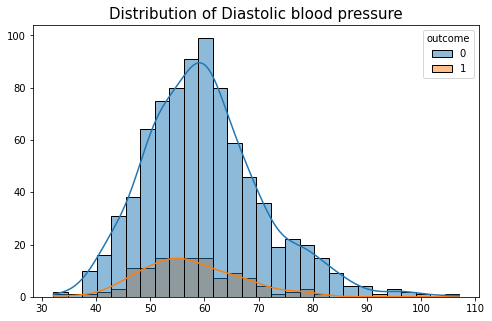

In [ ]:
plot_histogram_with_target("Diastolic blood pressure")

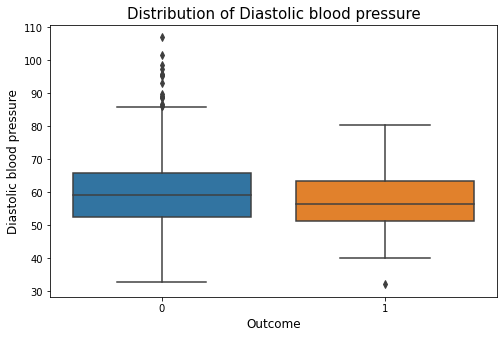

In [ ]:
plot_box_plot_with_target("Diastolic blood pressure")

### Respiratory rate

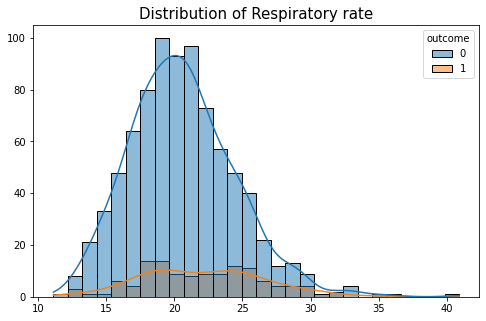

In [ ]:
plot_histogram_with_target("Respiratory rate")

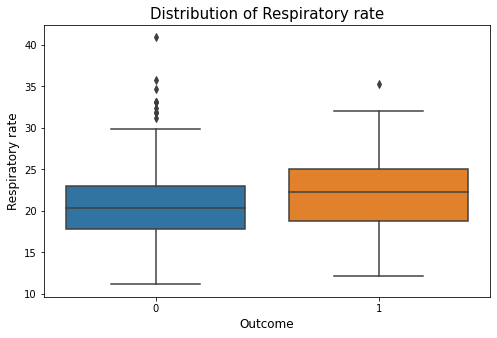

In [ ]:
plot_box_plot_with_target("Respiratory rate")

### Temperature

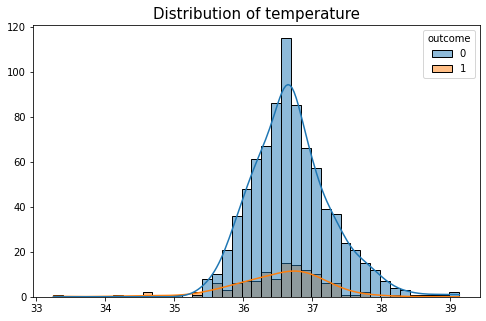

In [ ]:
plot_histogram_with_target("temperature")

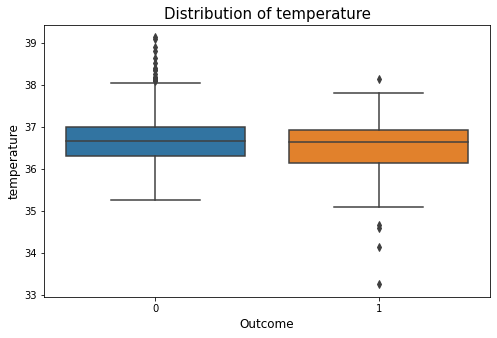

In [ ]:
plot_box_plot_with_target("temperature")

### SP O2

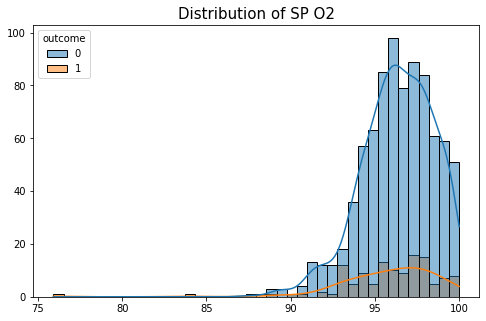

In [ ]:
plot_histogram_with_target("SP O2")

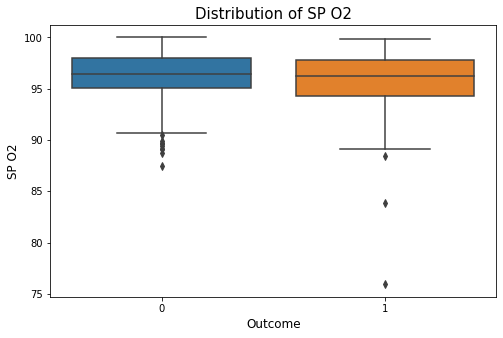

In [ ]:
plot_box_plot_with_target("SP O2")

### Urine output

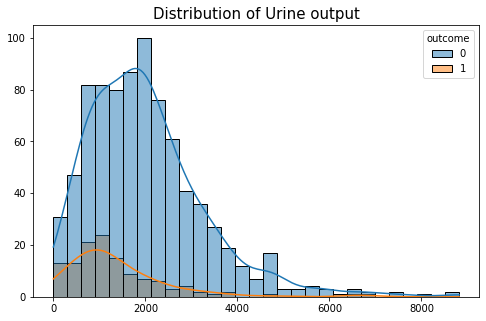

In [ ]:
plot_histogram_with_target("Urine output")

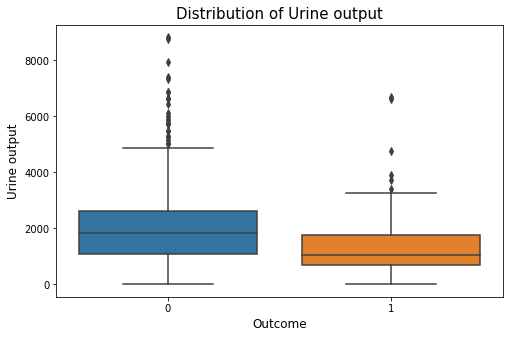

In [ ]:
plot_box_plot_with_target("Urine output")

## Comorbidities

### Hypertensive

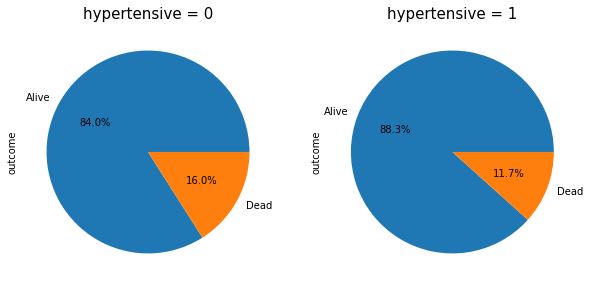

In [ ]:
plot_bin_pie("hypertensive")

### Atrial fibrillation

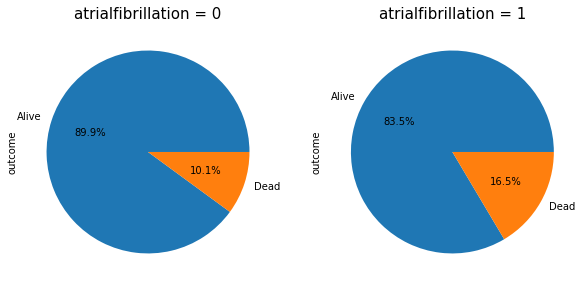

In [ ]:
plot_bin_pie("atrialfibrillation")

### Diabetes

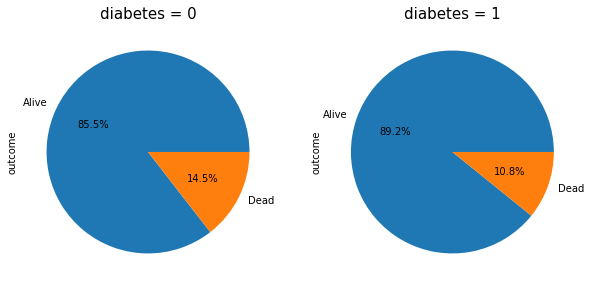

In [ ]:
plot_bin_pie("diabetes")

### Depression

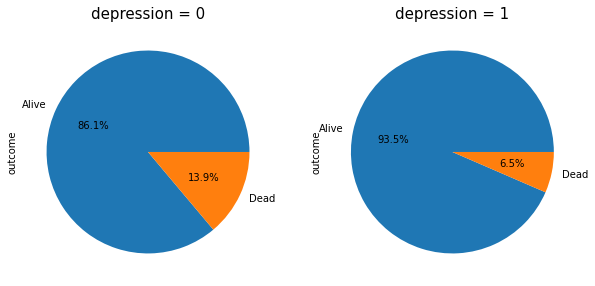

In [ ]:
plot_bin_pie("depression")

### Hyperlipemia

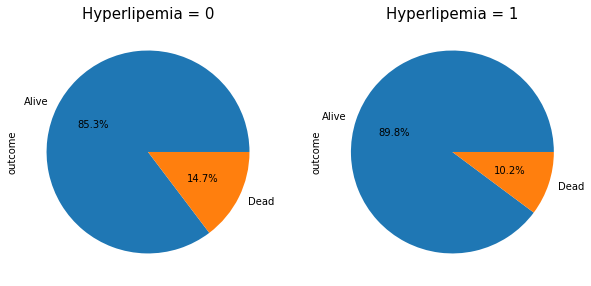

In [ ]:
plot_bin_pie("Hyperlipemia")

### CHD with no MI

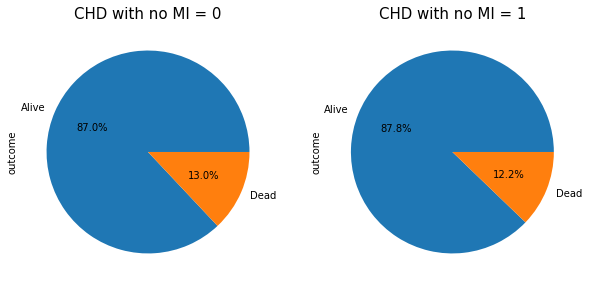

In [ ]:
plot_bin_pie("CHD with no MI")

### Renal failure

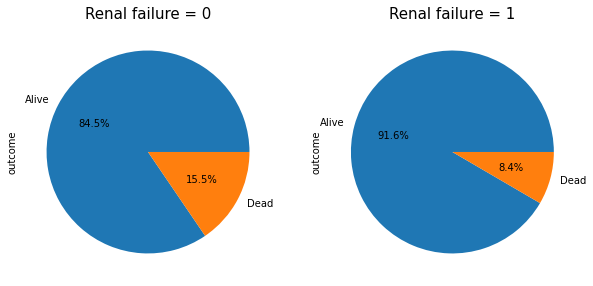

In [ ]:
plot_bin_pie("Renal failure")

### COPD

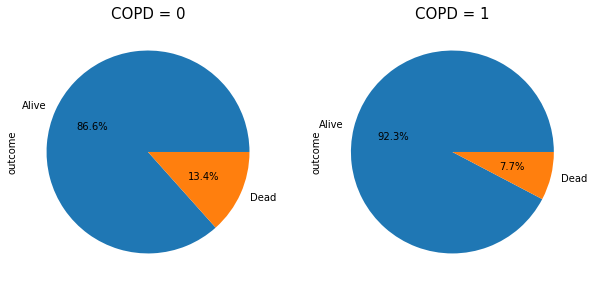

In [ ]:
plot_bin_pie("COPD")

### Deficiency Anemia

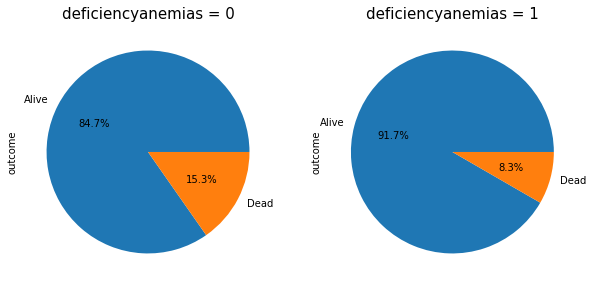

In [ ]:
plot_bin_pie("deficiencyanemias")

## Lab tests

### Hematocrit

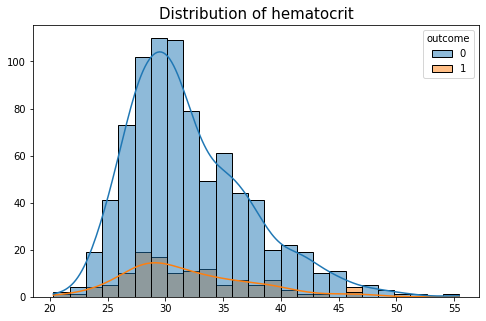

In [ ]:
plot_histogram_with_target("hematocrit")

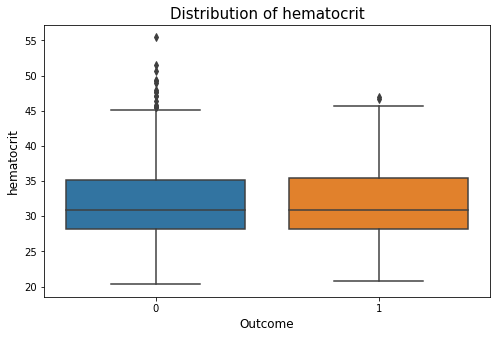

In [ ]:
plot_box_plot_with_target("hematocrit")

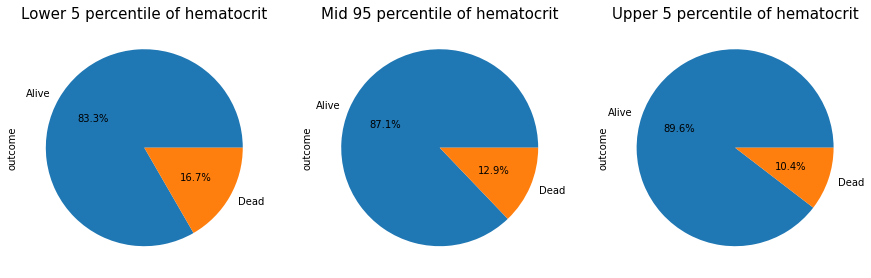

In [ ]:
plot_tri_pie("hematocrit")

### RBC

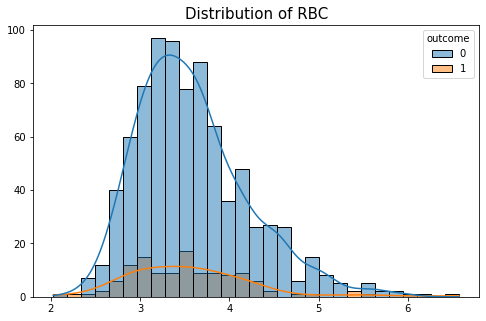

In [ ]:
plot_histogram_with_target("RBC")

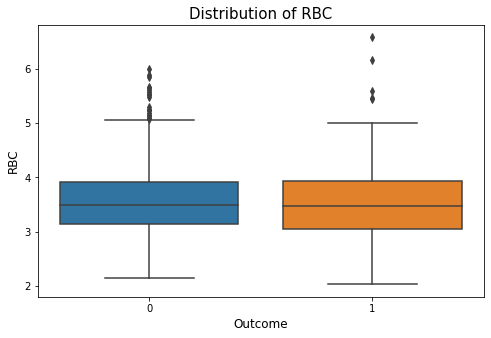

In [ ]:
plot_box_plot_with_target("RBC")

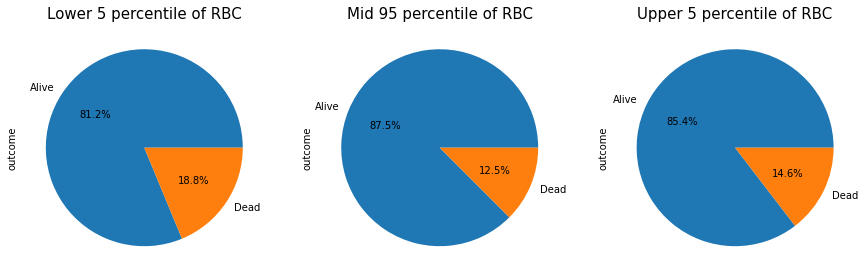

In [ ]:
plot_tri_pie("RBC")

### MCH

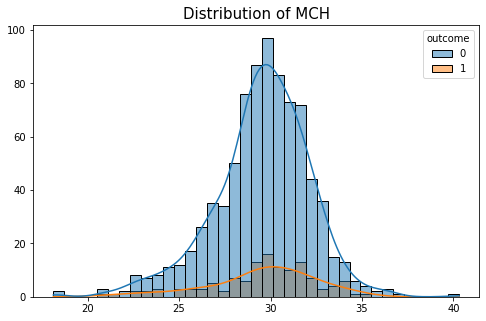

In [ ]:
plot_histogram_with_target("MCH")

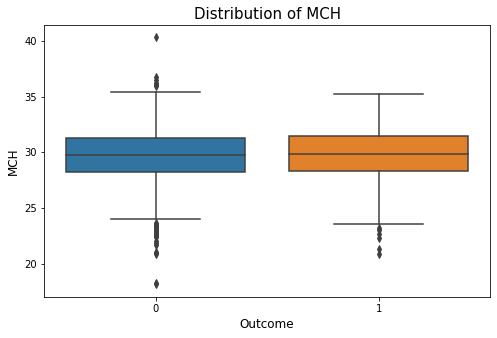

In [ ]:
plot_box_plot_with_target("MCH")

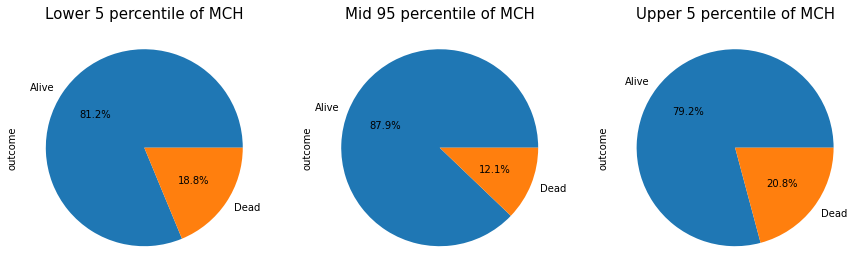

In [ ]:
plot_tri_pie("MCH")

### MCHC

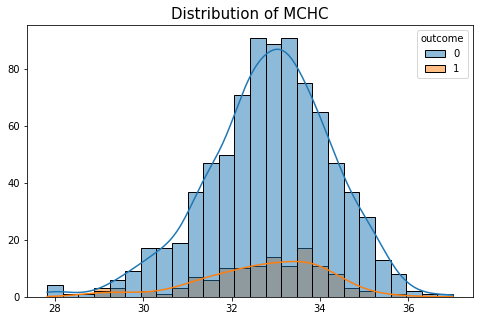

In [ ]:
plot_histogram_with_target("MCHC")

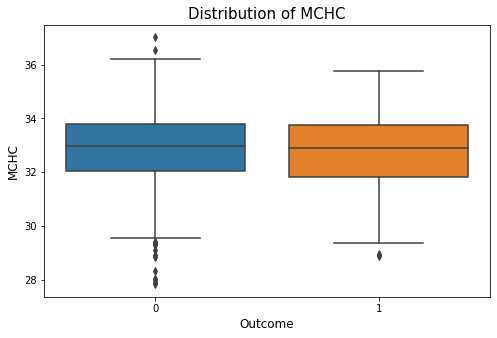

In [ ]:
plot_box_plot_with_target("MCHC")

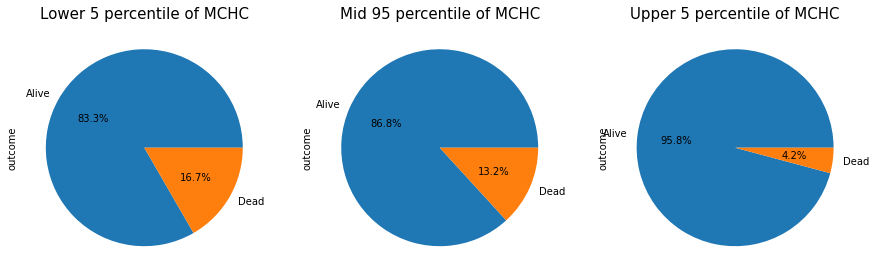

In [ ]:
plot_tri_pie("MCHC")

### MCV

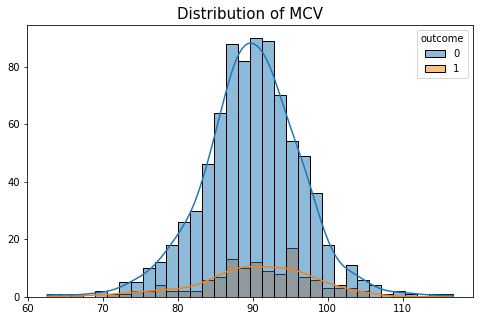

In [ ]:
plot_histogram_with_target("MCV")

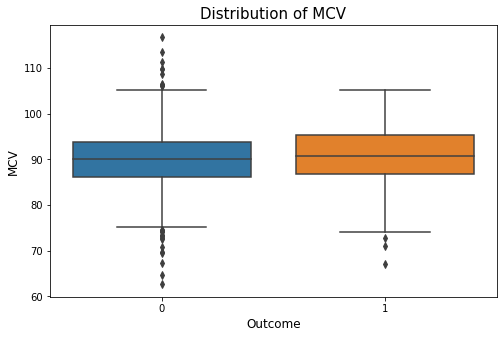

In [ ]:
plot_box_plot_with_target("MCV")

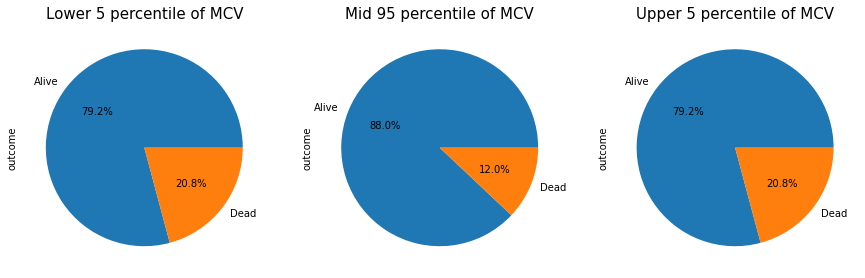

In [ ]:
plot_tri_pie("MCV")

### RDW

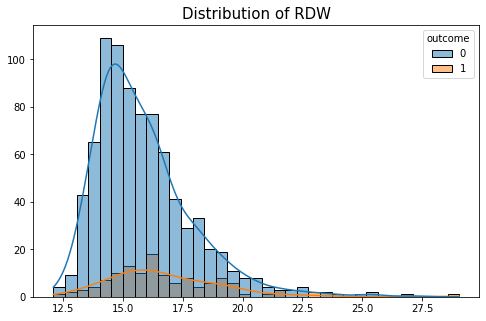

In [ ]:
plot_histogram_with_target("RDW")

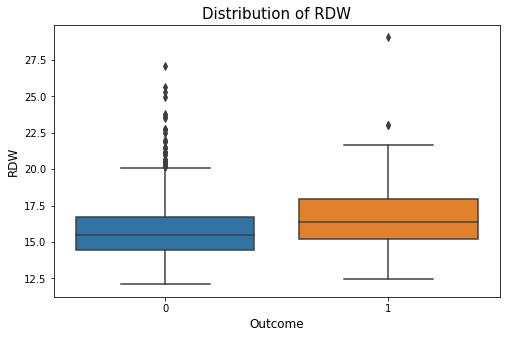

In [ ]:
plot_box_plot_with_target("RDW")

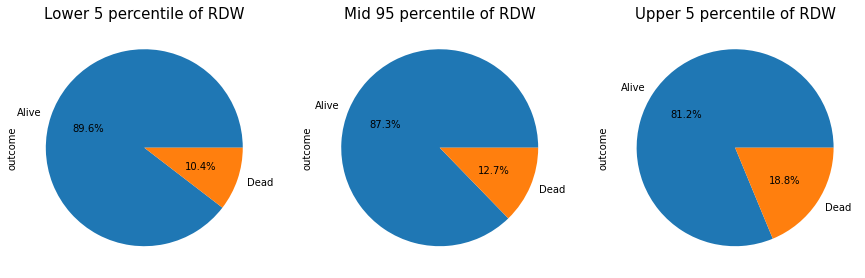

In [ ]:
plot_tri_pie("RDW")

### Leucocyte

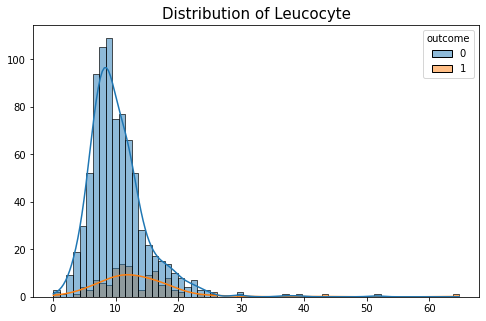

In [ ]:
plot_histogram_with_target("Leucocyte")

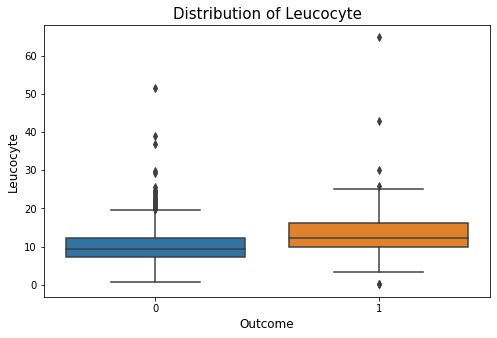

In [ ]:
plot_box_plot_with_target("Leucocyte")

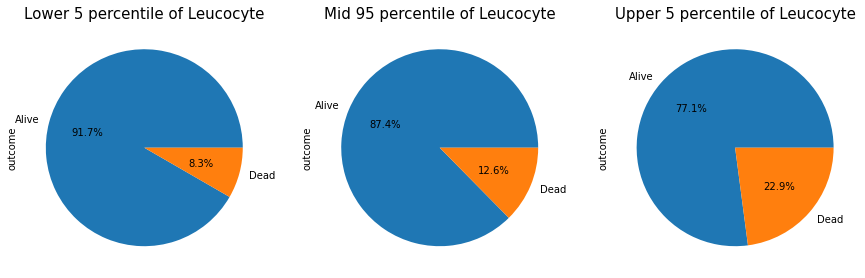

In [ ]:
plot_tri_pie("Leucocyte")

### Platelets

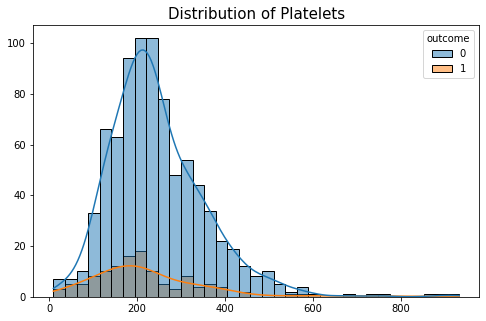

In [ ]:
plot_histogram_with_target("Platelets")

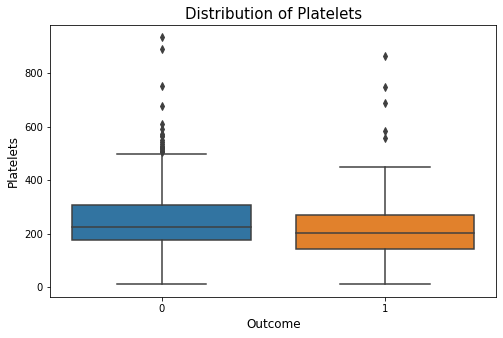

In [ ]:
plot_box_plot_with_target("Platelets")

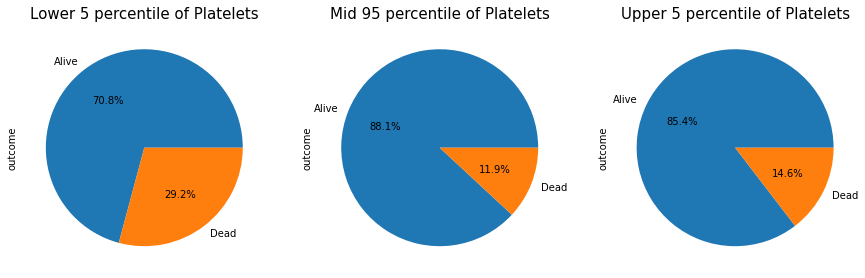

In [ ]:
plot_tri_pie("Platelets")

### Neutrophils

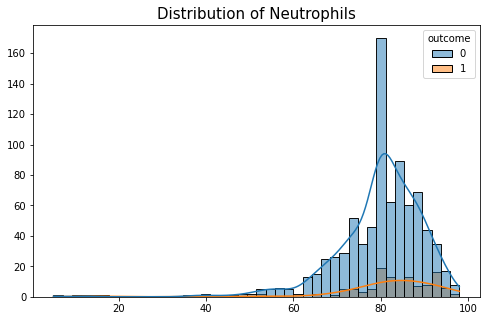

In [ ]:
plot_histogram_with_target("Neutrophils")

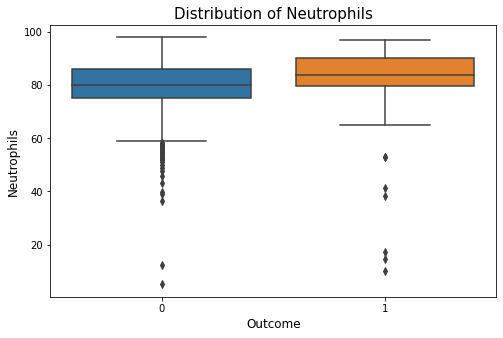

In [ ]:
plot_box_plot_with_target("Neutrophils")

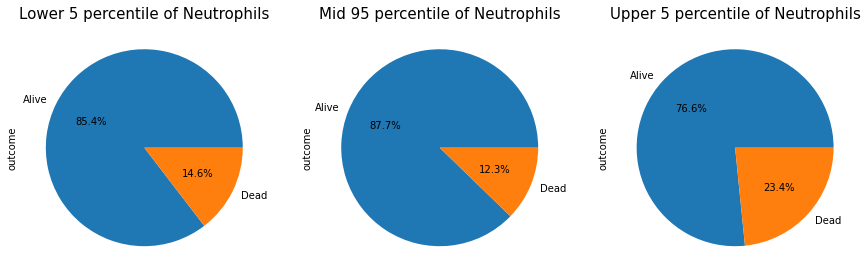

In [ ]:
plot_tri_pie("Neutrophils")

### Basophils

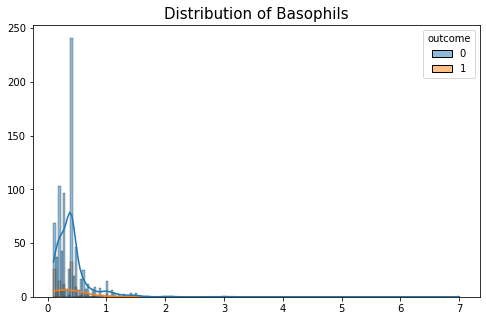

In [ ]:
plot_histogram_with_target("Basophils")

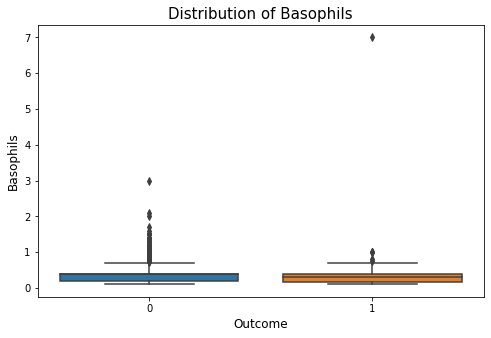

In [ ]:
plot_box_plot_with_target("Basophils")

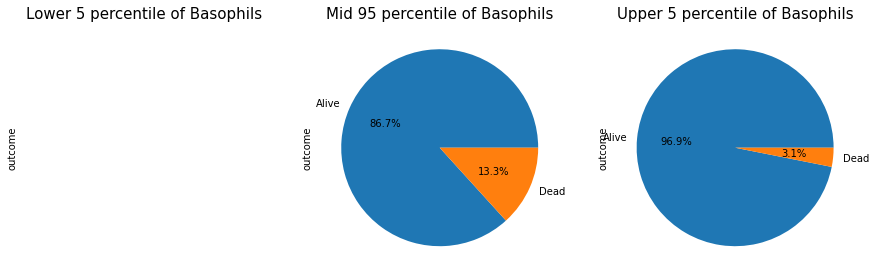

In [ ]:
plot_tri_pie("Basophils")

### Lymphocyte

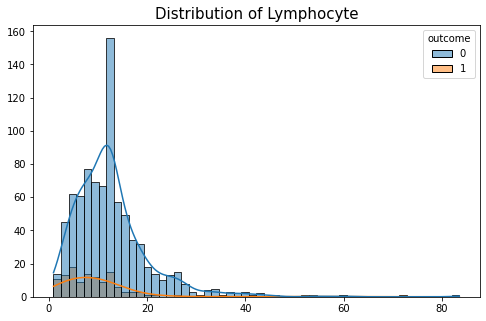

In [ ]:
plot_histogram_with_target("Lymphocyte")

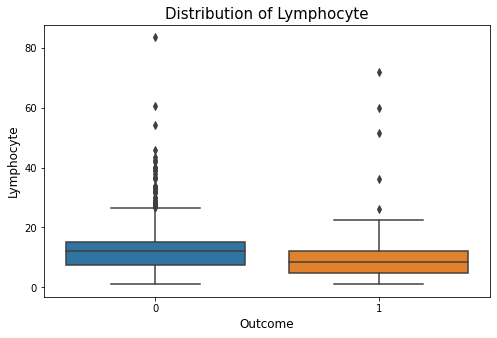

In [ ]:
plot_box_plot_with_target("Lymphocyte")

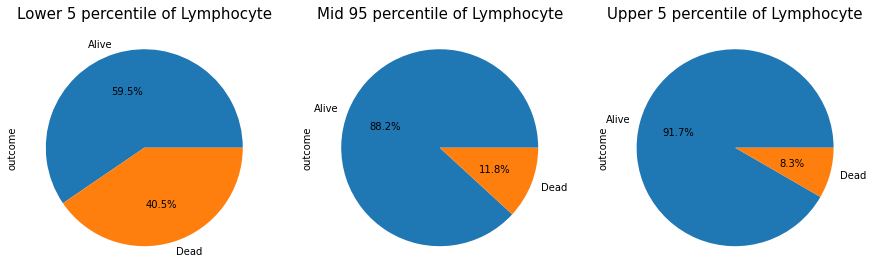

In [ ]:
plot_tri_pie("Lymphocyte")

### PT

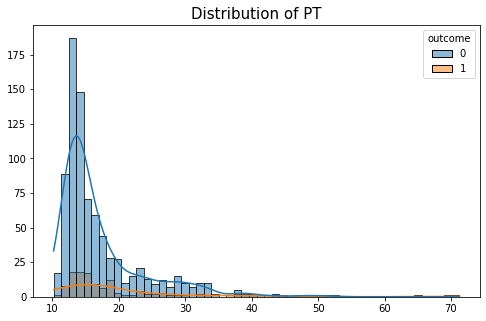

In [ ]:
plot_histogram_with_target("PT")

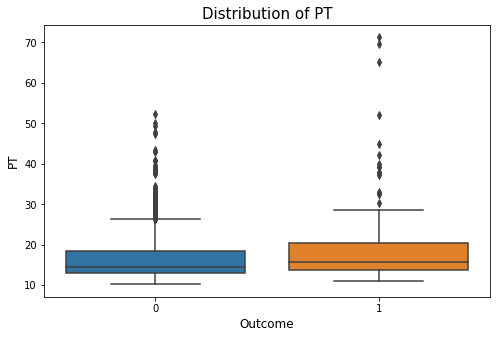

In [ ]:
plot_box_plot_with_target("PT")

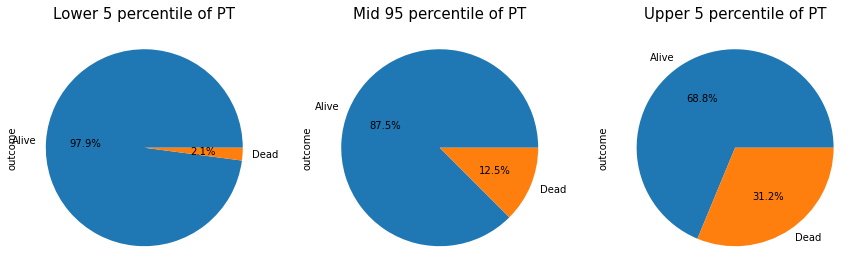

In [ ]:
plot_tri_pie("PT")

### INR

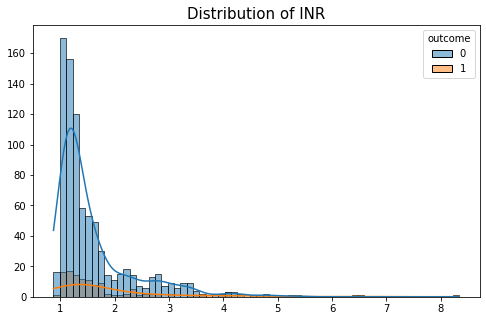

In [ ]:
plot_histogram_with_target("INR")

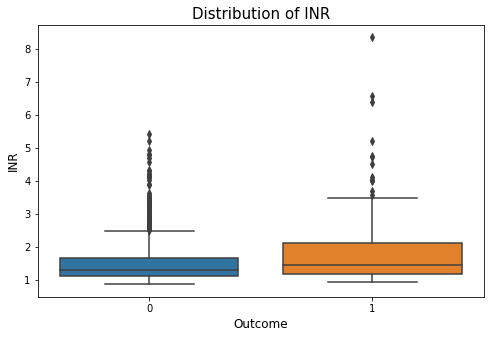

In [ ]:
plot_box_plot_with_target("INR")

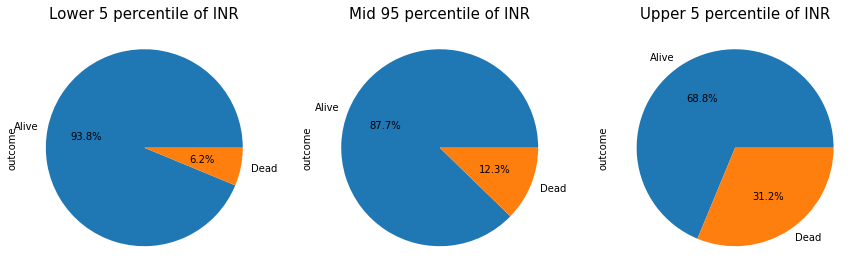

In [ ]:
plot_tri_pie("INR")

### NT-proBNP

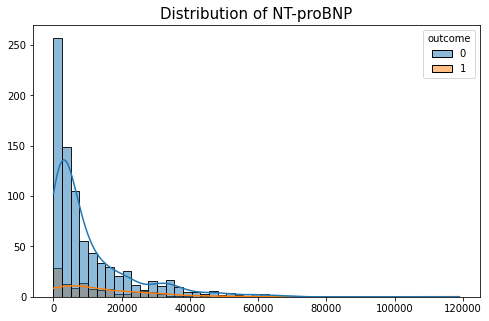

In [ ]:
plot_histogram_with_target("NT-proBNP")

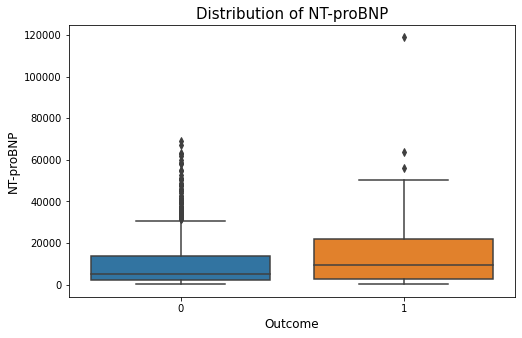

In [ ]:
plot_box_plot_with_target("NT-proBNP")

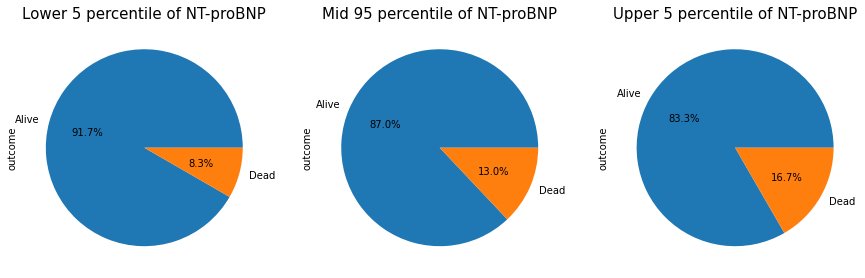

In [ ]:
plot_tri_pie("NT-proBNP")

### Creatine kinase

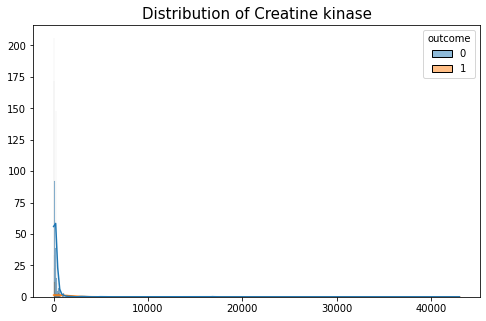

In [ ]:
plot_histogram_with_target("Creatine kinase")

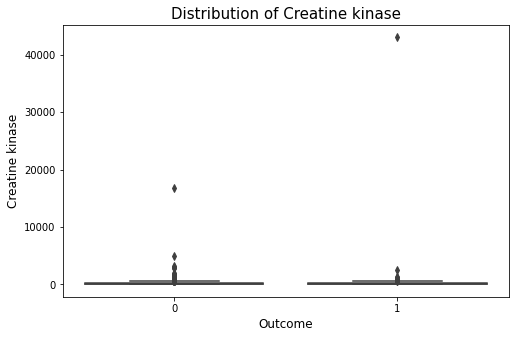

In [ ]:
plot_box_plot_with_target("Creatine kinase")

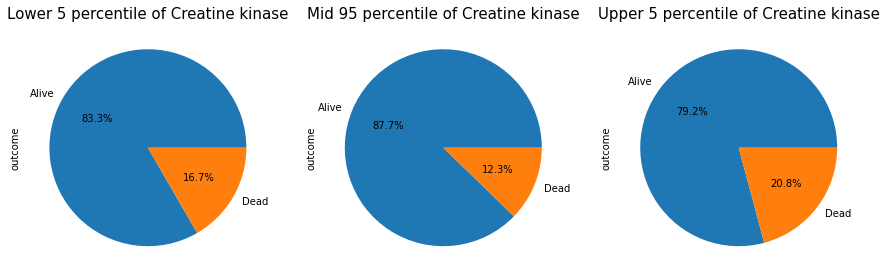

In [ ]:
plot_tri_pie("Creatine kinase")

### Creatinine

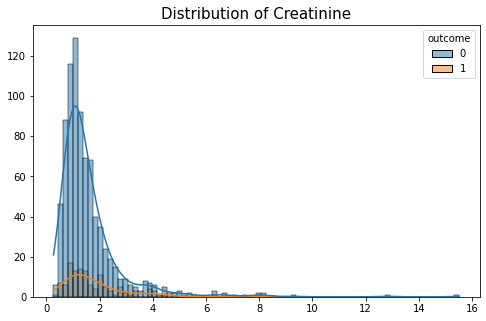

In [ ]:
plot_histogram_with_target("Creatinine")

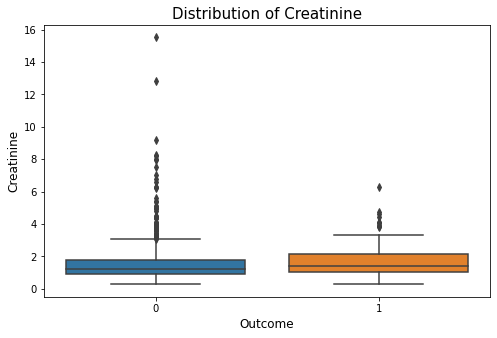

In [ ]:
plot_box_plot_with_target("Creatinine")

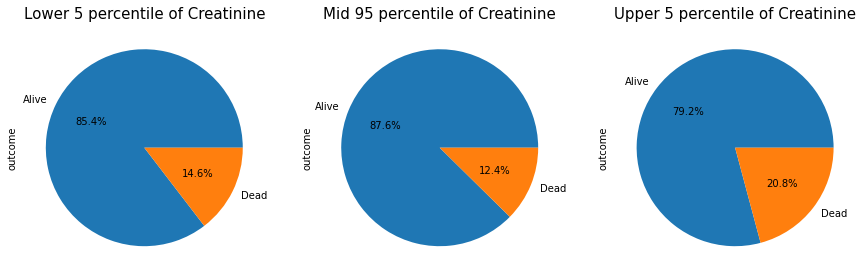

In [ ]:
plot_tri_pie("Creatinine")

### Urea nitrogen

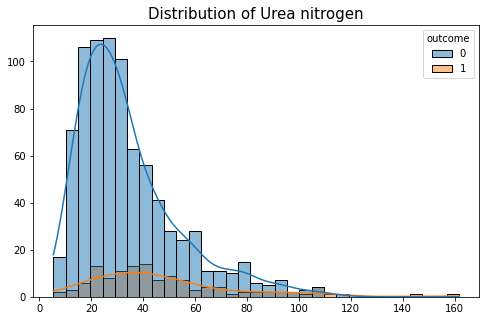

In [ ]:
plot_histogram_with_target("Urea nitrogen")

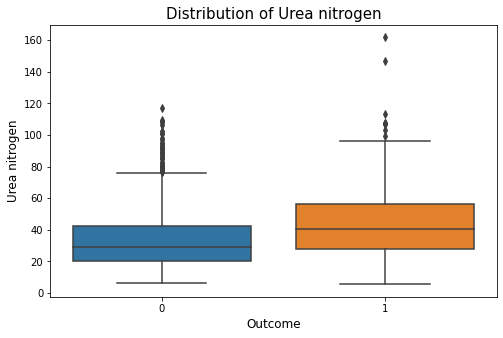

In [ ]:
plot_box_plot_with_target("Urea nitrogen")

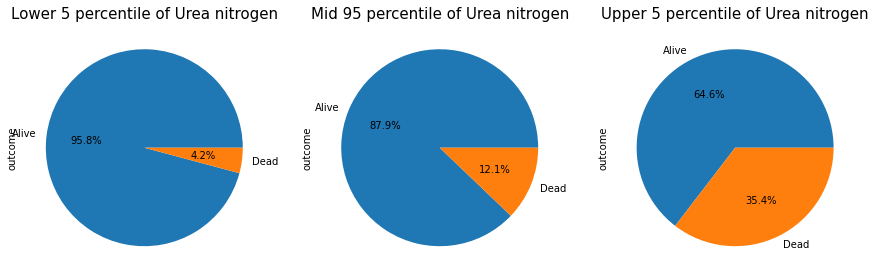

In [ ]:
plot_tri_pie("Urea nitrogen")

### glucose

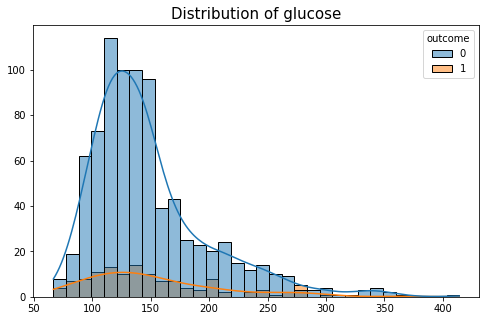

In [ ]:
plot_histogram_with_target("glucose")

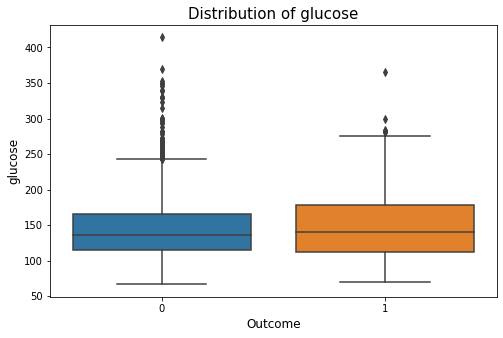

In [ ]:
plot_box_plot_with_target("glucose")

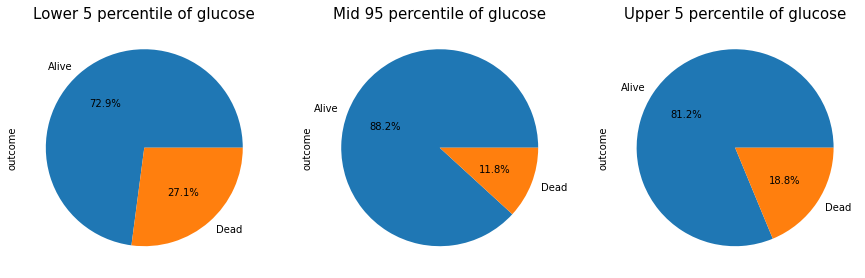

In [ ]:
plot_tri_pie("glucose")

### Blood potassium

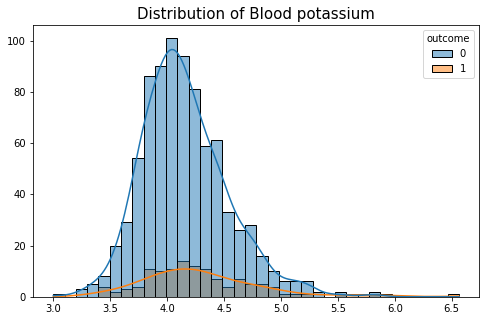

In [ ]:
plot_histogram_with_target("Blood potassium")

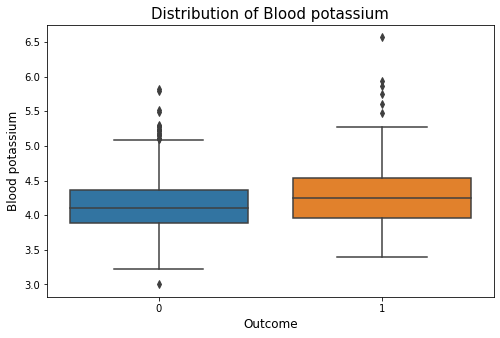

In [ ]:
plot_box_plot_with_target("Blood potassium")

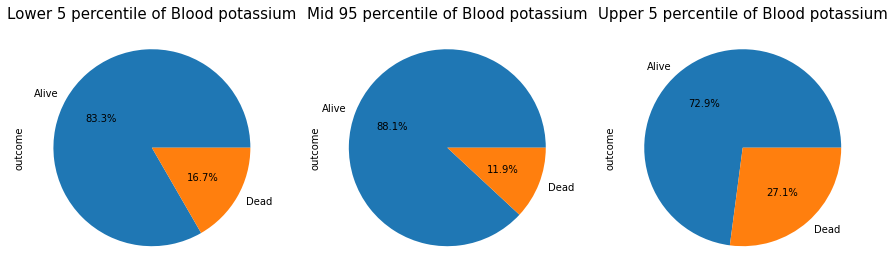

In [ ]:
plot_tri_pie("Blood potassium")

### Blood sodium

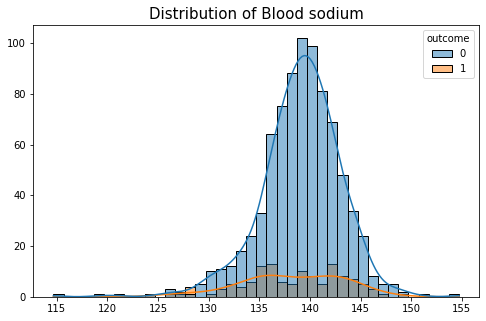

In [ ]:
plot_histogram_with_target("Blood sodium")

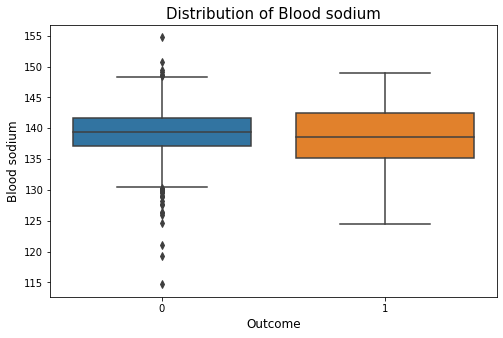

In [ ]:
plot_box_plot_with_target("Blood sodium")

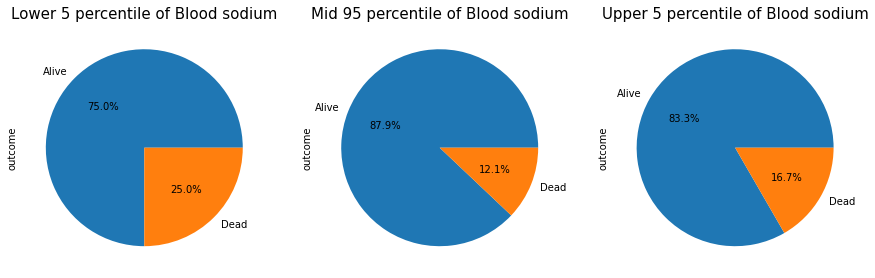

In [ ]:
plot_tri_pie("Blood sodium")

### Blood calcium

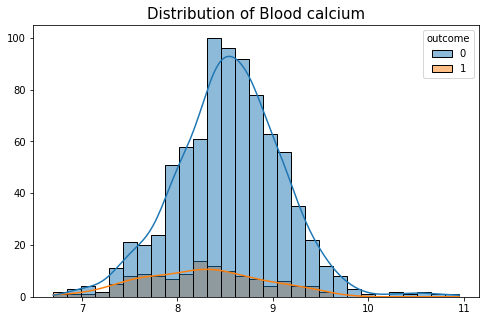

In [ ]:
plot_histogram_with_target("Blood calcium")

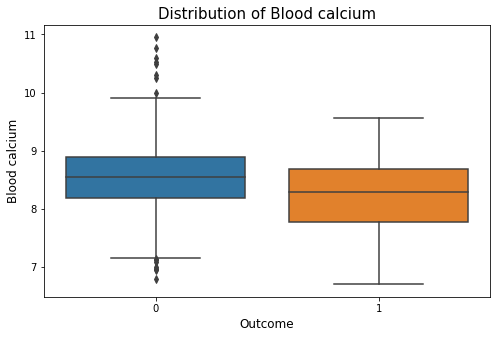

In [ ]:
plot_box_plot_with_target("Blood calcium")

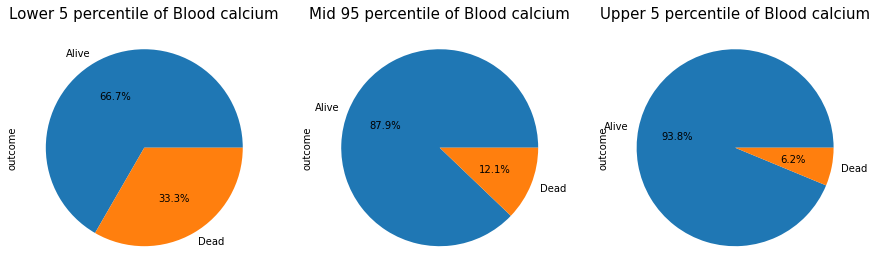

In [ ]:
plot_tri_pie("Blood calcium")

### Chloride

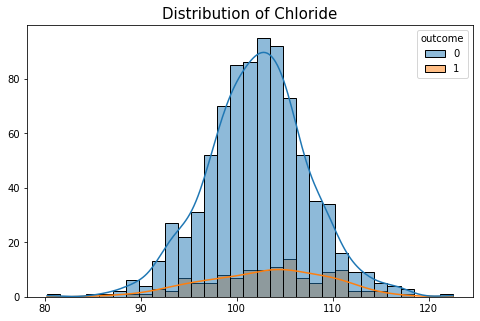

In [ ]:
plot_histogram_with_target("Chloride")

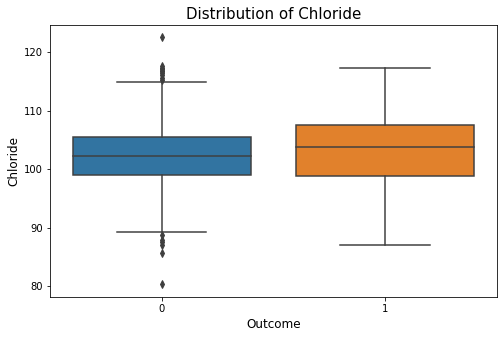

In [ ]:
plot_box_plot_with_target("Chloride")

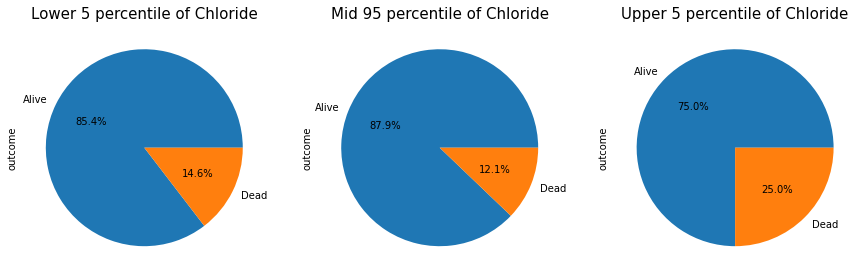

In [ ]:
plot_tri_pie("Chloride")

### Anion gap

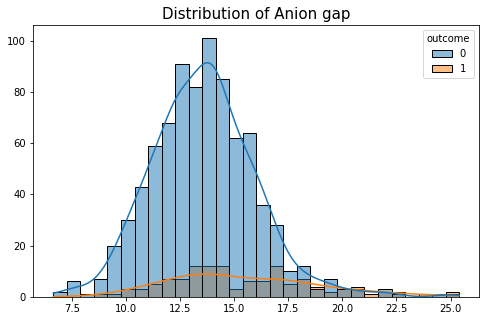

In [ ]:
plot_histogram_with_target("Anion gap")

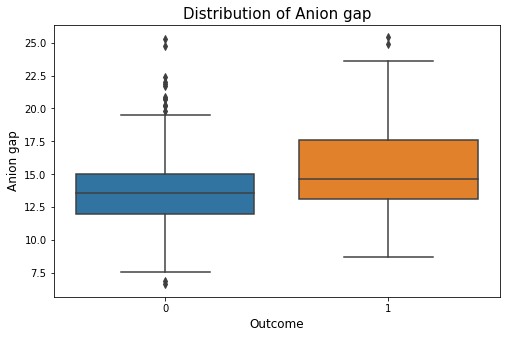

In [ ]:
plot_box_plot_with_target("Anion gap")

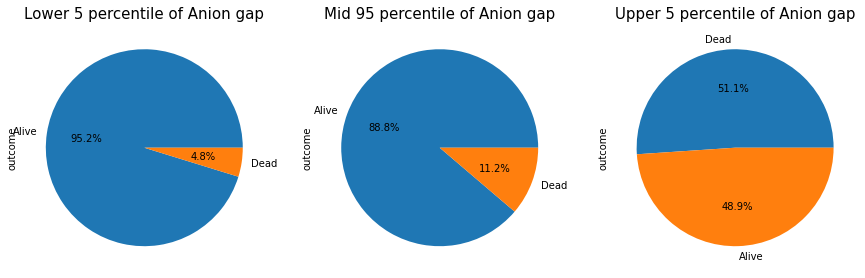

In [ ]:
plot_tri_pie("Anion gap")

### Magnesium ion

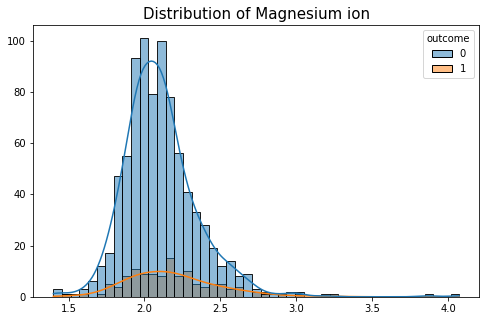

In [ ]:
plot_histogram_with_target("Magnesium ion")

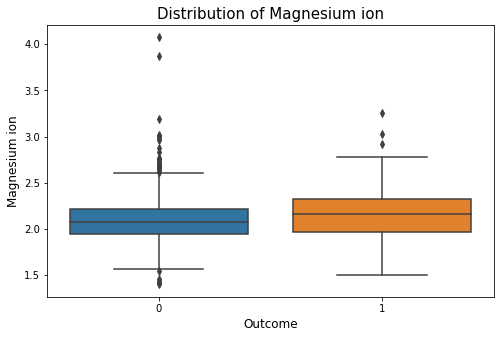

In [ ]:
plot_box_plot_with_target("Magnesium ion")

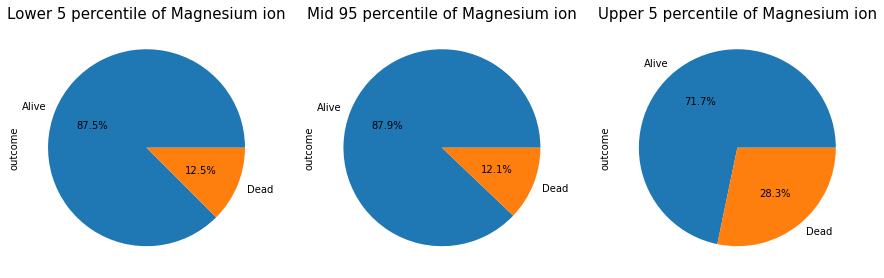

In [ ]:
plot_tri_pie("Magnesium ion")

### PH

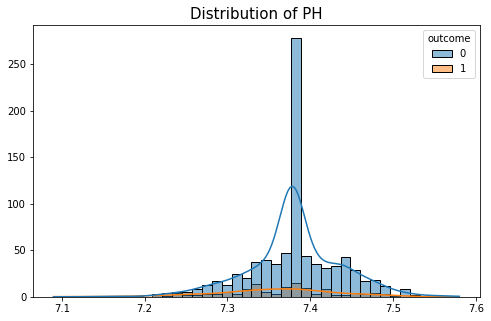

In [ ]:
plot_histogram_with_target("PH")

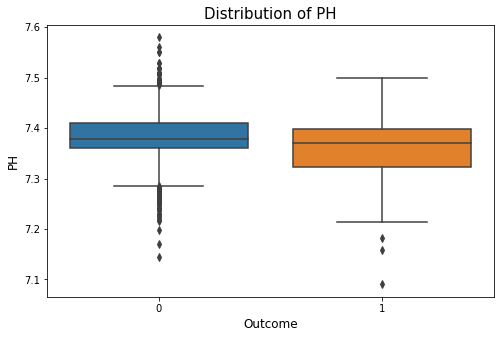

In [ ]:
plot_box_plot_with_target("PH")

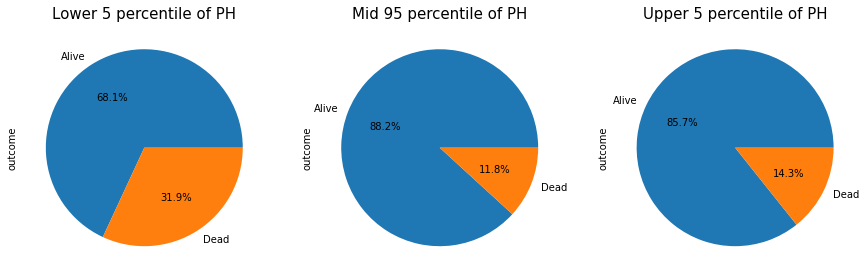

In [ ]:
plot_tri_pie("PH")

### Bicarbonate

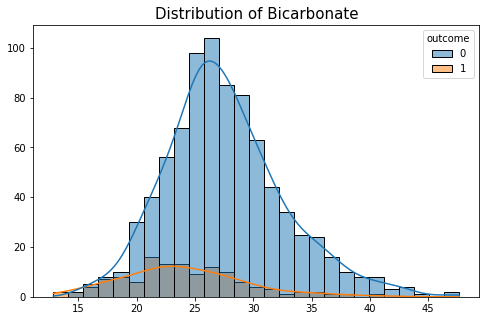

In [ ]:
plot_histogram_with_target("Bicarbonate")

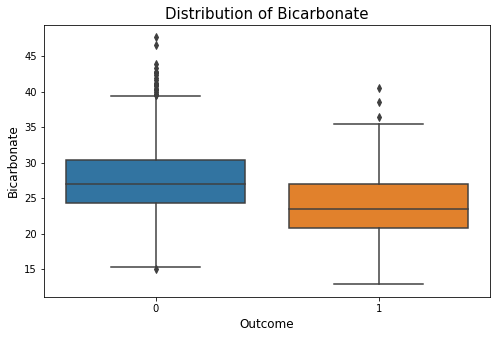

In [ ]:
plot_box_plot_with_target("Bicarbonate")

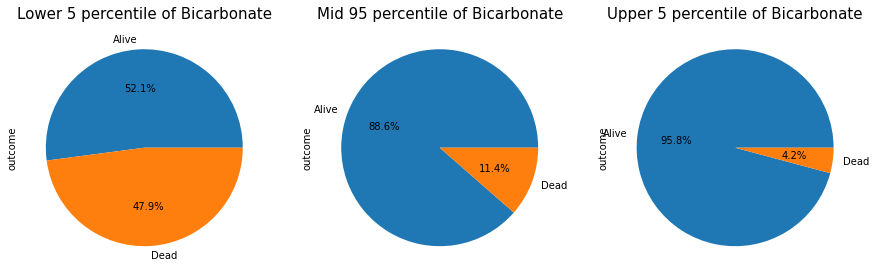

In [ ]:
plot_tri_pie("Bicarbonate")

### Lactic acid

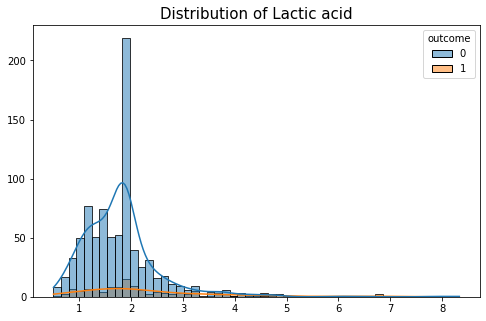

In [ ]:
plot_histogram_with_target("Lactic acid")

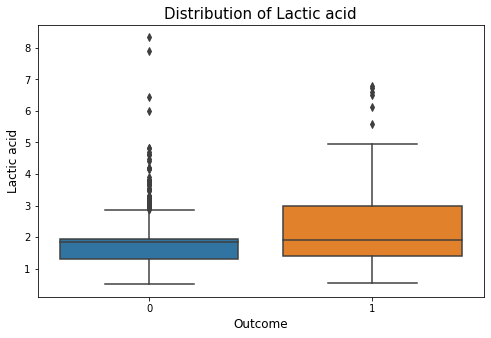

In [ ]:
plot_box_plot_with_target("Lactic acid")

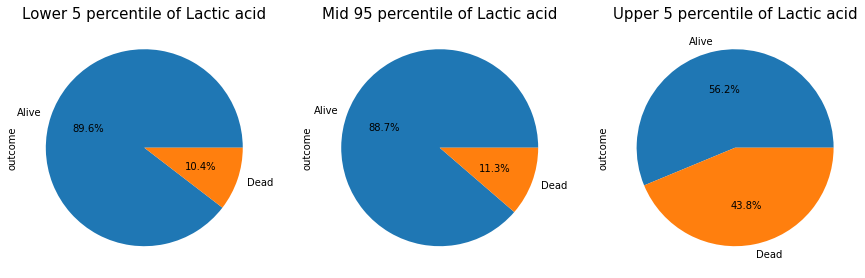

In [ ]:
plot_tri_pie("Lactic acid")

### PCO2

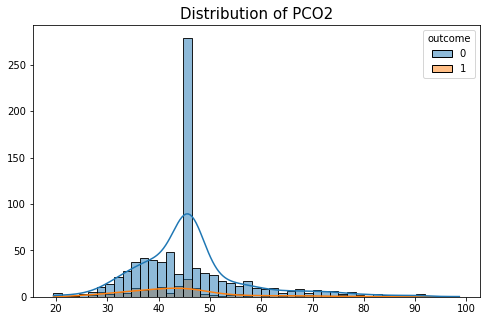

In [ ]:
plot_histogram_with_target("PCO2")

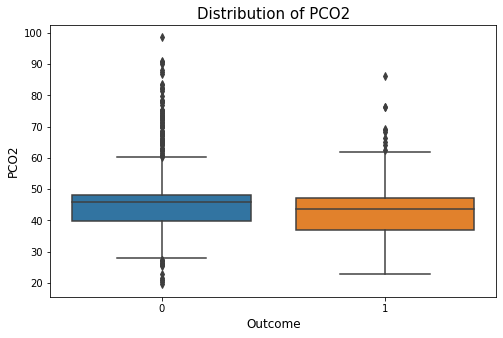

In [ ]:
plot_box_plot_with_target("PCO2")

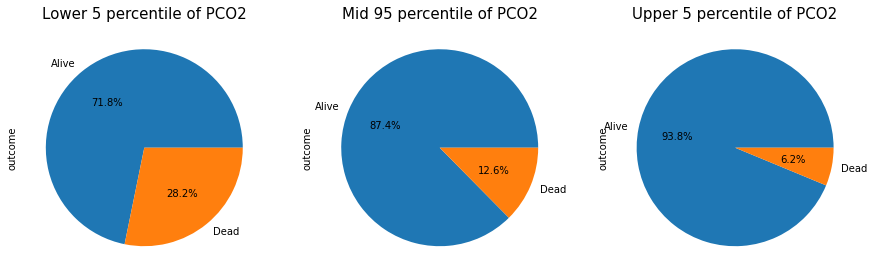

In [ ]:
plot_tri_pie("PCO2")

### EF

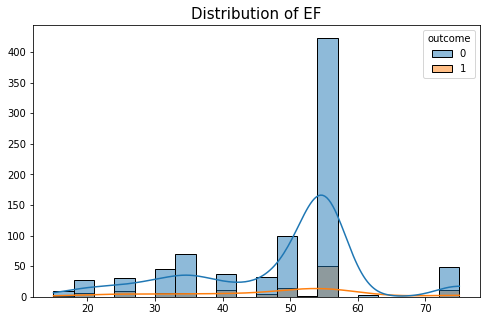

In [ ]:
plot_histogram_with_target("EF")

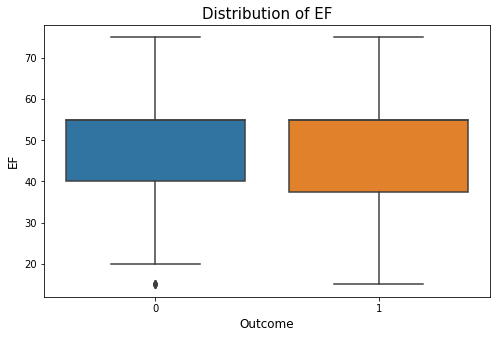

In [ ]:
plot_box_plot_with_target("EF")

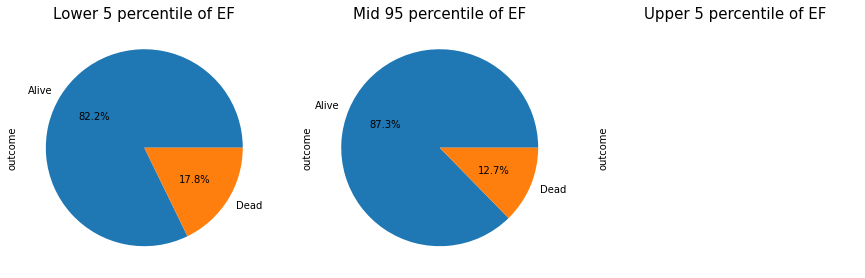

In [ ]:
plot_tri_pie("EF")

# Exporting data

In [ ]:
demographic_cols = ["BMI", "age", "gendera", "group"]

vitals_cols = [
  "heart rate", "Systolic blood pressure", "Diastolic blood pressure", 
  "Respiratory rate", "temperature", "SP O2", "Urine output"
]

comorbid_cols = [
  "hypertensive", "atrialfibrillation", "diabetes", 
  "depression", "Hyperlipemia", "CHD with no MI", 
  "Renal failure", "COPD", "deficiencyanemias"         
]

lab_cols = [
  "hematocrit", "RBC", "MCH", "MCHC", "MCV", "RDW", 
  "Leucocyte", "Platelets", "Neutrophils", "Basophils", 
  "Lymphocyte", "PT", "INR", "NT-proBNP", "Creatine kinase", 
  "Creatinine", "Urea nitrogen", "glucose", "Blood potassium", 
  "Blood sodium", "Blood calcium", "Chloride", "Anion gap", 
  "Magnesium ion", "PH", "Bicarbonate", "Lactic acid", "PCO2", "EF"
]

target_cols = ["outcome"]

missing_cols = [
  "BMI_was_missing", 
  "heart rate_was_missing", 
  "Systolic blood pressure_was_missing", 
  "Diastolic blood pressure_was_missing",
  "Respiratory rate_was_missing",
  "temperature_was_missing",
  "SP O2_was_missing",
  "Urine output_was_missing",
  "Neutrophils_was_missing",
  "Basophils_was_missing",
  "Lymphocyte_was_missing",
  "PT_was_missing",
  "INR_was_missing",
  "Creatine kinase_was_missing",
  "glucose_was_missing",
  "Blood calcium_was_missing",
  "PH_was_missing",
  "Lactic acid_was_missing",
  "PCO2_was_missing"
]

In [ ]:
train.to_csv("train.csv", index=False)
val.to_csv("val.csv", index=False)
test.to_csv("test.csv", index=False)